In [ ]:
import pandas as pd

In [ ]:
star = pd.read_csv("StarClassificationDataset.csv")
star.head()

<ipython-input-2-fd8b9a271008>:1: DtypeWarning: Columns (1,8) have mixed types. Specify dtype option on import or set low_memory=False.
  star = pd.read_csv("StarClassificationDataset.csv")


,object_ID,alpha,delta,UV_filter,green_filter,red_filter,near_IR_filter,IR_filter,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,red_shift,plate_ID,MJD,fiber_ID,class
0,1.240000e+18,135.6891066,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.540000e+18,0.634794,5812,56354,171,GALAXY
1,1.240000e+18,144.8261006,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.180000e+19,0.779136,10445,58158,427,GALAXY
2,1.240000e+18,142.1887896,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.150000e+18,0.644195,4576,55592,299,GALAXY
3,1.240000e+18,338.7410378,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030000e+19,0.932346,9149,58039,775,GALAXY
4,1.240000e+18,345.2825932,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,NaN,301,3,137,6.890000e+18,0.116123,6121,56187,842,GALAXY


In [ ]:
star.replace("", float("nan"), inplace=True)

In [ ]:
star.shape

(100000, 18)

In [ ]:
star['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [ ]:
star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   object_ID       100000 non-null  float64
 1   alpha           99999 non-null   object 
 2   delta           99998 non-null   float64
 3   UV_filter       100000 non-null  float64
 4   green_filter    100000 non-null  float64
 5   red_filter      100000 non-null  float64
 6   near_IR_filter  100000 non-null  float64
 7   IR_filter       100000 non-null  float64
 8   run_ID          99994 non-null   object 
 9   rerun_ID        100000 non-null  int64  
 10  cam_col         100000 non-null  int64  
 11  field_ID        100000 non-null  int64  
 12  spec_obj_ID     100000 non-null  float64
 13  red_shift       100000 non-null  float64
 14  plate_ID        100000 non-null  int64  
 15  MJD             100000 non-null  int64  
 16  fiber_ID        100000 non-null  int64  
 17  class      

In [ ]:
star.drop('object_ID', axis=1, inplace = True)

In [ ]:
star['alpha'] = pd.to_numeric(star['alpha'], errors='coerce')
star['run_ID'] = pd.to_numeric(star['run_ID'], errors='coerce')

In [ ]:
star.isna().sum()

,0
alpha,2
delta,2
UV_filter,0
green_filter,0
red_filter,0
near_IR_filter,0
IR_filter,0
run_ID,7
rerun_ID,0
cam_col,0


In [ ]:
star.dropna(axis=0,inplace=True)

In [ ]:
star.isna().sum()

,0
alpha,0
delta,0
UV_filter,0
green_filter,0
red_filter,0
near_IR_filter,0
IR_filter,0
run_ID,0
rerun_ID,0
cam_col,0


In [ ]:
star.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99989 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   alpha           99989 non-null  float64
 1   delta           99989 non-null  float64
 2   UV_filter       99989 non-null  float64
 3   green_filter    99989 non-null  float64
 4   red_filter      99989 non-null  float64
 5   near_IR_filter  99989 non-null  float64
 6   IR_filter       99989 non-null  float64
 7   run_ID          99989 non-null  float64
 8   rerun_ID        99989 non-null  int64  
 9   cam_col         99989 non-null  int64  
 10  field_ID        99989 non-null  int64  
 11  spec_obj_ID     99989 non-null  float64
 12  red_shift       99989 non-null  float64
 13  plate_ID        99989 non-null  int64  
 14  MJD             99989 non-null  int64  
 15  fiber_ID        99989 non-null  int64  
 16  class           99989 non-null  object 
dtypes: float64(10), int64(6), object(1)


In [ ]:
X = star.drop('class',axis=1)
y = star['class']

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
enc_y = label_encoder.fit_transform(y)

In [ ]:
enc_y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, enc_y, test_size=0.2, stratify=enc_y, random_state=42)


print("Original class distribution:", pd.Series(y).value_counts(normalize=True))
print("Train class distribution:", pd.Series(y_train).value_counts(normalize=True))
print("Test class distribution:", pd.Series(y_test).value_counts(normalize=True))

Original class distribution: class
GALAXY    0.594415
STAR      0.215964
QSO       0.189621
Name: proportion, dtype: float64
Train class distribution: 0    0.594417
2    0.215962
1    0.189621
Name: proportion, dtype: float64
Test class distribution: 0    0.594409
2    0.215972
1    0.189619
Name: proportion, dtype: float64


In [ ]:
y_train

array([0, 2, 0, ..., 0, 0, 1])

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print("acuraccy socre: ", accuracy_score(y_test,y_pred))
print()
print("classification report: ")
print(classification_report(y_test, y_pred))
print()
print("confusion matrix: ", confusion_matrix(y_test,y_pred))

acuraccy socre:  0.5944094409440944

classification report: 
              precision    recall  f1-score   support

           0       0.59      1.00      0.75     11887
           1       0.00      0.00      0.00      3792
           2       0.00      0.00      0.00      4319

    accuracy                           0.59     19998
   macro avg       0.20      0.33      0.25     19998
weighted avg       0.35      0.59      0.44     19998


confusion matrix:  [[11887     0     0]
 [ 3792     0     0]
 [ 4319     0     0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print("acuraccy socre: ", accuracy_score(y_test,y_pred))
print()
print("classification report: ")
print(classification_report(y_test, y_pred))
print()
print("confusion matrix: ", confusion_matrix(y_test,y_pred))

acuraccy socre:  0.9635963596359636

classification report: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     11887
           1       0.91      0.91      0.91      3792
           2       1.00      0.99      0.99      4319

    accuracy                           0.96     19998
   macro avg       0.96      0.96      0.96     19998
weighted avg       0.96      0.96      0.96     19998


confusion matrix:  [[11530   343    14]
 [  337  3455     0]
 [   33     1  4285]]


Findings:
Class 0:

97% of the samples predicted as galaxy (positive) are indeed galaxy (positive).
The model achieves 99% recall for galaxy classification, with only a 1% false negative rate (misclassified galaxies).
The model performs well, maintaining a 99% balance between recall and precision.
Class 1:

100% of the predicted positive samples are correctly classified.
The model identifies 91% of the actual positives, with a 9% false negative rate.
It demonstrates strong performance with a 91% balance between recall and precision.
Class 2:

91% of the predicted positives are correctly classified.
The model captures 91% of the actual positives, with a 9% false negative rate.
It maintains a 91% balance between recall and precision.
The overall model accuracy is 96%, correctly classifying 96% of total samples.

The macro-average of precision, recall, and F1-score across all classes (without considering class imbalance) is 96%.

The weighted-average of precision, recall, and F1-score across all classes (considering class imbalance) is also 96%.


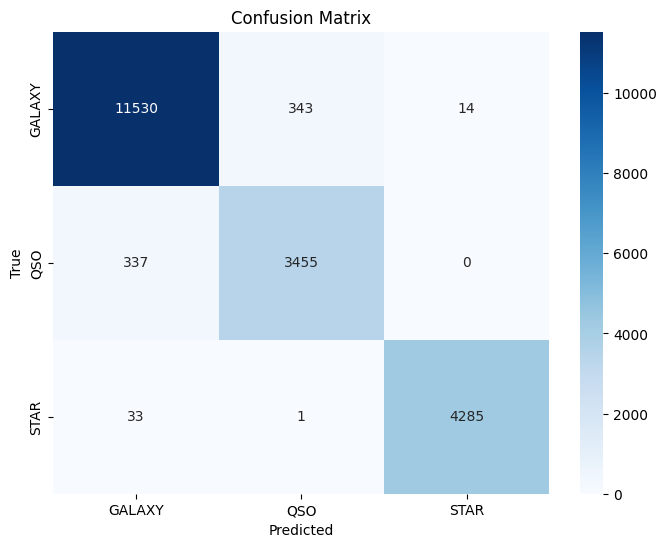

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


Among all galaxy classifications, 11,530 were correctly predicted as galaxies (true positives), while 343 were misclassified as QSOs (false positives) and 14 were misclassified as stars (false positives).

Among all QSO classifications, 3,455 were correctly predicted as QSOs (true positives), while 337 were misclassified as galaxies (false positives), and none were misclassified as stars.

Among all star classifications, 4,285 were correctly predicted as stars (true positives), while 33 were misclassified as galaxies (false positives) and 1 was misclassified as a star (false positive).

In [ ]:
import pandas as pd
house = pd.read_csv("housing.csv")
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
house.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
median_ratio = (house["total_bedrooms"] / house["total_rooms"]).median()
house["total_bedrooms"].fillna(house["total_rooms"] * median_ratio, inplace=True)

<ipython-input-4-88d2ff3fb211>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house["total_bedrooms"].fillna(house["total_rooms"] * median_ratio, inplace=True)


In [ ]:
house.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
house['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
house['ocean_proximity'] = le.fit_transform(house['ocean_proximity'])

In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   longitude                20640 non-null  float64
 1   latitude                 20640 non-null  float64
 2   housing_median_age       20640 non-null  float64
 3   total_rooms              20640 non-null  float64
 4   total_bedrooms           20640 non-null  float64
 5   population               20640 non-null  float64
 6   households               20640 non-null  float64
 7   median_income            20640 non-null  float64
 8   median_house_value       20640 non-null  float64
 9   ocean_proximity          20640 non-null  int64  
 10  median_house_value_bins  20640 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 1.7 MB


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np

num_bins = int(1 + np.log2(len(house)))  # Sturge’s Rule

house["median_house_value_bins"] = pd.cut(house["median_house_value"], bins=num_bins, labels=False)

# Stratified Split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_idx, test_idx in split.split(house, house["median_house_value_bins"] ):
    train_set = house.loc[train_idx].drop(columns=["median_house_value_bins"] )
    test_set = house.loc[test_idx].drop(columns=["median_house_value_bins"] )

In [ ]:
from sklearn.model_selection import train_test_split
X_train = train_set.drop("median_house_value", axis=1)
y_train = train_set["median_house_value"]
X_test = test_set.drop("median_house_value", axis=1)
y_test = test_set["median_house_value"]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error, mean_absolute_error

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)

ridge_preds = ridge_model.predict(X_test_scaled)
lasso_preds = lasso_model.predict(X_test_scaled)

ridge_mae = mean_absolute_error(y_test, ridge_preds)
ridge_mse = mean_squared_error(y_test, ridge_preds)
ridge_rmse = root_mean_squared_error(y_test, ridge_preds)
ridge_r2 = r2_score(y_test, ridge_preds)

lasso_mae = mean_absolute_error(y_test, lasso_preds)
lasso_mse = mean_squared_error(y_test, lasso_preds)
lasso_rmse = root_mean_squared_error(y_test, lasso_preds)
lasso_r2 = r2_score(y_test, lasso_preds)

print('''with ridge:
mae:''', ridge_mae,
''' mse:''', ridge_mse,
''' rmse:''', ridge_rmse)
print('''with lasso:
mae:''', lasso_mae,
''' mse:''', lasso_mse,
''' rmse:''', lasso_rmse)

with ridge: 
mae: 50553.22563861208  mse: 4835081463.695418  rmse: 69534.75004409967
with lasso: 
mae: 50553.51333556865  mse: 4835085537.075834  rmse: 69534.77933434343


Findings:
The MAE, MSE, and RMSE values are nearly identical for both L1 regularization (Lasso) and L2 regularization (Ridge), suggesting that neither model has a significant advantage over the other in terms of these metrics.

Since Ridge retains all features while Lasso shrinks some coefficients to zero, and their performance remains similar, it indicates that the dataset likely does not contain strongly irrelevant features.

Experimenting with different alpha values for both Ridge and Lasso could provide deeper insights and potentially improve performance.